In [1]:
#import relevant packages
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

#import data as .csv file and create a dataframe using pandas
sakura_data = pd.read_csv('hirosaki_temp_cherry_bloom.csv')
sakura_df = pd.DataFrame(sakura_data)

# Data Cleaning:

In [2]:
#start checking out the data and getting summary info
sakura_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9131 entries, 0 to 9130
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9131 non-null   object 
 1   temperature    9131 non-null   float64
 2   flower_status  75 non-null     object 
dtypes: float64(1), object(2)
memory usage: 214.1+ KB


In [3]:
sakura_df.head()

#there are only 3 columns and it seems like "flower_status" is missing a lot of values (because the flowers only bloom for a short period of time per year)

,date,temperature,flower_status
0,1997/1/1,2.9,NaN
1,1997/1/2,2.2,NaN
2,1997/1/3,-1.6,NaN
3,1997/1/4,0.2,NaN
4,1997/1/5,-0.4,NaN


In [4]:
#split date column into three parts
dates = sakura_df['date'].str.split('/', expand=True)
sakura_df['year'], sakura_df['month'], sakura_df['day'] = dates[0], dates[1], dates[2]

#check result
sakura_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9131 entries, 0 to 9130
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9131 non-null   object 
 1   temperature    9131 non-null   float64
 2   flower_status  75 non-null     object 
 3   year           9131 non-null   object 
 4   month          9131 non-null   object 
 5   day            9131 non-null   object 
dtypes: float64(1), object(5)
memory usage: 428.1+ KB


In [5]:
#filling in flower status column
# bloom: 0, full bloom: 1, scatter: 2, before/after/not blooming: 3
sakura_df2 = []
for x in range(len(sakura_df)):
    year = sakura_df['year'][x]
    month = sakura_df['month'][x]
    day = sakura_df['day'][x]
    temperature = sakura_df['temperature'][x]
    flower_status = sakura_df['flower_status'][x]
    if flower_status == 'bloom':
        status = 0
    elif flower_status == 'full':
        status = 1
    elif flower_status == 'scatter':
        status = 2
    else:
        status = 3
    sakura_dict = {'year':year, 'month':month, 'day':day, 'temperature':temperature, 'flower_status':status}
    sakura_df2.append(sakura_dict)

sakura_df2 = pd.DataFrame(sakura_df2)

sakura_df2.head()

,year,month,day,temperature,flower_status
0,1997,1,1,2.9,3
1,1997,1,2,2.2,3
2,1997,1,3,-1.6,3
3,1997,1,4,0.2,3
4,1997,1,5,-0.4,3


In [6]:
#count of all flower status values that actually indicate a bloom
sakura_df2[['month', 'flower_status']].value_counts()

#from this data we can see that the bloom has only occurred during the months of April and May in our dataset

month  flower_status
1      3                775
10     3                775
8      3                775
12     3                775
7      3                775
3      3                775
5      3                756
6      3                750
9      3                750
11     3                750
2      3                706
4      3                694
       0                 25
       1                 18
       2                 13
5      2                 12
       1                  7
dtype: int64

In [7]:
#creating a new dataframe to encapsulate only the blooming months
sakura_bloom_df = []
for x in range(len(sakura_df2)):
    month = sakura_df2['month'][x]
    if month == '4' or month == '5': #April or May
        sakura_dict = {'month':month, 'day':sakura_df2['day'][x], 'temperature':sakura_df2['temperature'][x], 'flower_status':sakura_df2['flower_status'][x]}
        sakura_bloom_df.append(sakura_dict)

sakura_bloom_df = pd.DataFrame(sakura_bloom_df)
sakura_bloom_df.head()


,month,day,temperature,flower_status
0,4,1,6.1,3
1,4,2,5.7,3
2,4,3,7.5,3
3,4,4,7.4,3
4,4,5,6.6,3


# Data Relationship Analysis/EDA

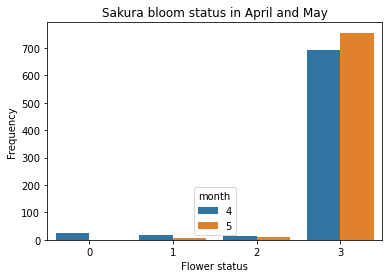

In [8]:
#visualizing what percentage of the time within the blooming months we actually see blooming flowers (to any extent)

_ = sns.countplot(data=sakura_bloom_df, x='flower_status', hue='month')
plt.xlabel('Flower status')
plt.ylabel('Frequency')
plt.title('Sakura bloom status in April and May')
plt.show()

From this figure we can clearly see that, even during the two blooming months, the actual bloom period is short.

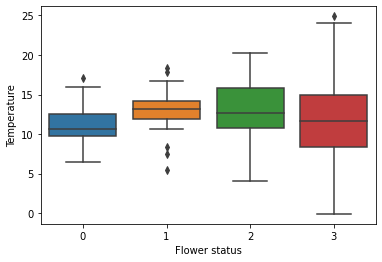

In [9]:
#visualizing the relationship between temperature and bloom status within the two blooming months

sns.boxplot(data=sakura_bloom_df,
            x='flower_status',
            y='temperature')
plt.xlabel('Flower status')
plt.ylabel('Temperature')
plt.show()

From this figure we can see that the median temperature of all 4 bloom statuses, from no flowers to full bloom, is relatively similar, clustered between roughly 10-13 degrees C. However, the range of temperatures associated with the non-bloom status is significantly wider than the blooming statuses. If we include the outliers of the boxplot for status 1, we can note that the temperature range tightens with each step towards the full bloom status.

Text(0.5, 0.98, 'Sakura Bloom Feature Correlation for Blooming Months')

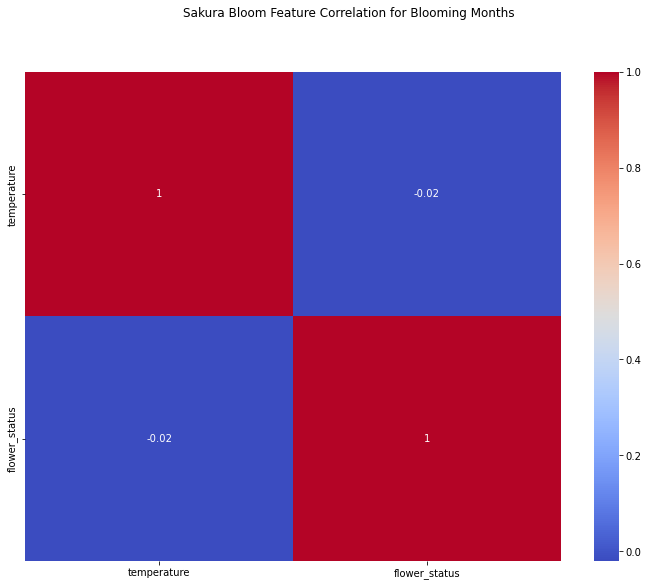

In [10]:
#creating a correlation matrix/heatmap to look at the correlation of all variables/features within the dataset

corr_mat = sakura_bloom_df.corr()
f, ax = plt.subplots(figsize=(12,9))
hm = sns.heatmap(round(corr_mat,2), annot=True, ax=ax, cmap='coolwarm')
f.suptitle('Sakura Bloom Feature Correlation for Blooming Months')



There are only two features being analyzed here, but it is interesting (and maybe a little disheartening) to note that temperature and flower status are not very well correlated in the dataset.

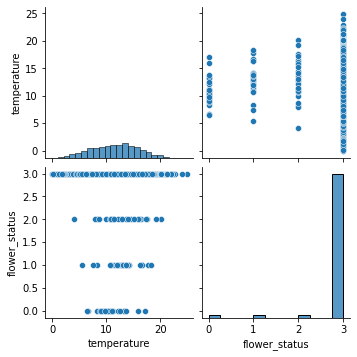

In [11]:
#another visualization of what we've seen above
sns.pairplot(sakura_bloom_df)

In [12]:
#checking out each bloom month individually to see the bloom timeline - split into 2 dataframes

april_df = sakura_bloom_df[sakura_bloom_df['month'] == '4']
may_df = sakura_bloom_df[sakura_bloom_df['month'] == '5']

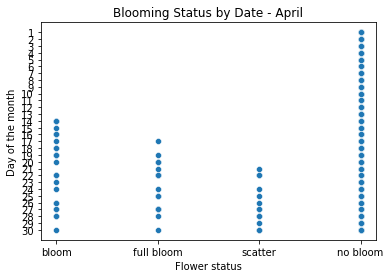

In [13]:
scatter_apr = sns.scatterplot(data=april_df, x='flower_status', y='day')

plt.xticks([0,1,2,3], ['bloom', 'full bloom', 'scatter', 'no bloom'])
plt.xlabel('Flower status')
plt.ylabel('Day of the month')
plt.title('Blooming Status by Date - April')
plt.show()

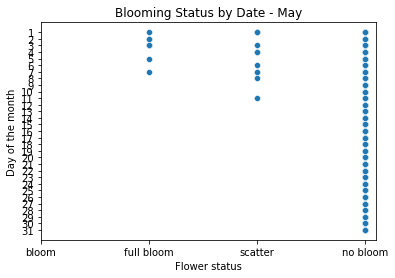

In [14]:
scatter_may = sns.scatterplot(data=may_df, x='flower_status', y='day')

plt.xticks([0,1,2,3], ['bloom', 'full bloom', 'scatter', 'no bloom'])
plt.xlabel('Flower status')
plt.ylabel('Day of the month')
plt.title('Blooming Status by Date - May')
plt.show()

These two plots indicate that we can expect the bloom to start at the earliest in mid-April, and end at the latest in early/mid-May. This will be useful information when modeling our predictions for future years.

# Pre-Processing and Training Data

In [15]:
#pre-processing data to prepare for model

#check out dataframe of all year's data
sakura_bloom_df.head()

,month,day,temperature,flower_status
0,4,1,6.1,3
1,4,2,5.7,3
2,4,3,7.5,3
3,4,4,7.4,3
4,4,5,6.6,3


In [16]:
modellist = []

for i in range(len(sakura_bloom_df)):
    month, day = sakura_bloom_df['month'][i], sakura_bloom_df['day'][i]
    if month == '4' and day == '1':
        cum_temp = 0
    temp = sakura_bloom_df['temperature'][i]
    cum_temp += temp
    status = sakura_bloom_df['flower_status'][i]
    sakura_dict = {'month':month, 'day':day, 'temperature':temp, 'cumulative_temp':cum_temp, 'flower_status':status}
    modellist.append(sakura_dict)

model_df = pd.DataFrame(modellist)

model_df

,month,day,temperature,cumulative_temp,flower_status
0,4,1,6.1,6.1,3
1,4,2,5.7,11.8,3
2,4,3,7.5,19.3,3
3,4,4,7.4,26.7,3
4,4,5,6.6,33.3,3
...,...,...,...,...,...
1520,5,27,14.6,671.8,3
1521,5,28,16.0,687.8,3
1522,5,29,16.6,704.4,3
1523,5,30,14.9,719.3,3


In [17]:
# creating binary categories of flower status for modeling.
# all blooming statuses (0-2) will be considered a bloom and encoded with a "1" status, 
# while non-bloom (3) will be the other category in the binary, with "0" status

model_df.loc[model_df['flower_status'] == 0, 'flower_status'] = 1
model_df.loc[model_df['flower_status'] == 2, 'flower_status'] = 1

model_df.loc[model_df['flower_status'] == 3, 'flower_status'] = 0


model_df

,month,day,temperature,cumulative_temp,flower_status
0,4,1,6.1,6.1,0
1,4,2,5.7,11.8,0
2,4,3,7.5,19.3,0
3,4,4,7.4,26.7,0
4,4,5,6.6,33.3,0
...,...,...,...,...,...
1520,5,27,14.6,671.8,0
1521,5,28,16.0,687.8,0
1522,5,29,16.6,704.4,0
1523,5,30,14.9,719.3,0


In [18]:
#training and testing data 
X = model_df.drop('flower_status', axis=1)
y = model_df['flower_status']

In [19]:
#import necessary preprocessing tools from scikitlearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#use scaler to standardize magnitude of numeric features
scaled_features = MinMaxScaler().fit_transform(X)

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.25, random_state = 0, stratify=y)

In [20]:
X_train
y_train.shape

(1143,)

# Modeling

In [21]:
#import packages for model construction/analysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from numpy import argmax
import numpy as np

def model_and_test(X_train, X_test, y_train, y_test, class_weight=None, threshold=False):
    
    # build and plot PCA
    pca = PCA(n_components=2) #4 different possible bloom statuses, heavily unbalanced towards category 3. Considering statuses 0-2 as a category and 3 as a category
    pca.fit(X_train)
    X_pca = pca.transform(X_train)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    plt.show()
    
    # Build and fit the model
    if class_weight:
        model = DecisionTreeClassifier(class_weight=class_weight)
    else:
        model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    
    # Test the model
    y_pred = model.predict(X_test)
    print('Precision score %s' % precision_score(y_test, y_pred, average='binary'))
    print('Recall score %s' % recall_score(y_test, y_pred, average='binary'))
    print('F1-score score %s' % f1_score(y_test, y_pred, average='binary'))
    print('Accuracy score %s' % accuracy_score(y_test, y_pred))
    
    y_score = model.predict_proba(X_test)
    fpr0, tpr0, thresholds = roc_curve(y_test, y_score[:, 1])
    roc_auc0 = auc(fpr0, tpr0)
    
    # Calculate the best threshold
    best_threshold = None
    if threshold:
        J = tpr0 - fpr0
        ix = argmax(J) # take the value which maximizes the J variable
        best_threshold = thresholds[ix]
        # adjust score according to threshold
        y_score = np.array([[1, y[1]] if y[0] >= best_threshold else [0, y[1]] for y in y_score])
        
    
    # Plot metrics 
    #plot_roc_curve(y_test, y_score)
    #plt.show()
    
    #plot_precision_recall_curve(y_test, y_score)
    #plt.show()

    
    # Print a classification report
    print(classification_report(y_test, y_pred))
    return roc_auc0, fpr0, tpr0, best_threshold

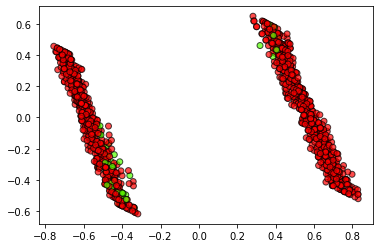

Precision score 0.2916666666666667
Recall score 0.3684210526315789
F1-score score 0.32558139534883723
Accuracy score 0.9240837696335078
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       363
           1       0.29      0.37      0.33        19

    accuracy                           0.92       382
   macro avg       0.63      0.66      0.64       382
weighted avg       0.93      0.92      0.93       382



In [22]:
#check function with the existing imbalanced dataset
roc_imbal, fpr_imbal, tpr_imbal, thresh_imbal = model_and_test(X_train, X_test, y_train, y_test)

Above is the result of using the model/test on the unbalanced dataset (with binary categories of bloom and no bloom) without correcting the imbalance in any way. The PCA graph clearly indicates that the red (no bloom) heavily dominates, and this is supported by the classification report with much stronger modeling metrics for the more present non-bloom data.

In [23]:
# trying balancing the dataset by oversampling the bloom 1s to match the non-bloom 0s in the training data

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

over_sampler = RandomOverSampler(random_state=0)
X_over, y_over = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_over)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 1087, 1: 1087})
Testing target statistics: Counter({0: 363, 1: 19})


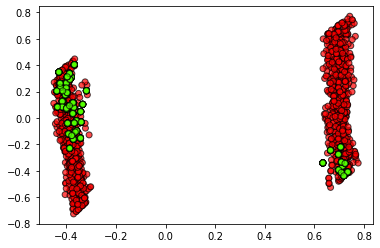

Precision score 0.2777777777777778
Recall score 0.2631578947368421
F1-score score 0.27027027027027023
Accuracy score 0.9293193717277487
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       363
           1       0.28      0.26      0.27        19

    accuracy                           0.93       382
   macro avg       0.62      0.61      0.62       382
weighted avg       0.93      0.93      0.93       382



In [24]:
roc_over, fpr_over, tpr_over, thresh_over = model_and_test(X_over, X_test, y_over, y_test)

The result of using the modeling function on the dataset with oversampled bloom values is better, with slight improvements to all the metrics. Next we will try another method, undersampling the non-bloom values, and see if it improves on this model.

In [25]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=0)
X_under, y_under = under_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_under)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 56, 1: 56})
Testing target statistics: Counter({0: 363, 1: 19})


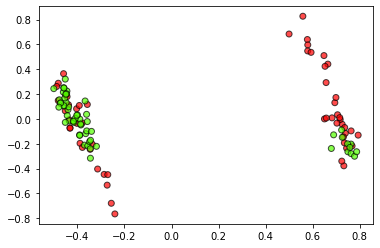

Precision score 0.17073170731707318
Recall score 0.7368421052631579
F1-score score 0.27722772277227725
Accuracy score 0.8089005235602095
              precision    recall  f1-score   support

           0       0.98      0.81      0.89       363
           1       0.17      0.74      0.28        19

    accuracy                           0.81       382
   macro avg       0.58      0.77      0.58       382
weighted avg       0.94      0.81      0.86       382



In [26]:
roc_under, fpr_under, tpr_under, thresh_under = model_and_test(X_under, X_test, y_under, y_test)

This model seems to be less effective than the oversampling model, as the accuracy, precision, and F1 scores are all decreased. The only area in which the model seems to have improved is the recall metric.

Because the oversampled model is the superior model, I will expand on it by applying the SMOTE method and checking the results.

In [27]:
from imblearn.over_sampling import SMOTE
over_sampler_smote = SMOTE(k_neighbors=2)
X_ovsm, y_ovsm = over_sampler_smote.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_ovsm)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 1087, 1: 1087})
Testing target statistics: Counter({0: 363, 1: 19})


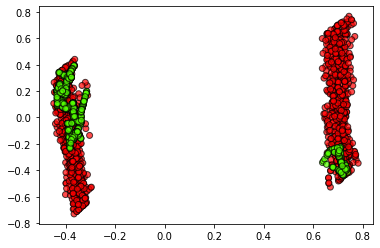

Precision score 0.1388888888888889
Recall score 0.2631578947368421
F1-score score 0.18181818181818182
Accuracy score 0.8821989528795812
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       363
           1       0.14      0.26      0.18        19

    accuracy                           0.88       382
   macro avg       0.55      0.59      0.56       382
weighted avg       0.92      0.88      0.90       382



In [28]:
roc_ovsm, fpr_ovsm, tpr_ovsm, thresh_ovsm = model_and_test(X_ovsm, X_test, y_ovsm, y_test)

This does not make improvements to the oversampled model.